In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
df=pd.DataFrame({'numbers':[1,2,3,4,5,np.nan,np.nan]})

In [4]:
df

,numbers
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,NaN
6,NaN


In [5]:
df.isnull().sum()

numbers    2
dtype: int64

In [10]:
df=df.fillna(method='ffill')
print(df)

   numbers
0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      5.0
6      5.0


In [14]:
df=df.fillna(df['numbers'].mean)
print(df)
df.reset_index

   numbers
0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      5.0
6      5.0


<bound method DataFrame.reset_index of    numbers
0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      5.0
6      5.0>

In [18]:
data=pd.read_csv('train.csv')

In [21]:
data.shape

(2000, 21)

In [22]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [32]:
data=data.rename(columns={"blue":"bluetooth",
                      "fc":"fc_megapixel",
                      "pc":"pc_megapixel",
                      "m_dep":"m_depth"})

In [33]:
print(data)

      battery_power  bluetooth  clock_speed  dual_sim  fc_megapixel  four_g  \
0               842          0          2.2         0             1       0   
1              1021          1          0.5         1             0       1   
2               563          1          0.5         1             2       1   
3               615          1          2.5         0             0       0   
4              1821          1          1.2         0            13       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      int_memory  m_depth  mobile_wt  n_cores  ... 

In [35]:
duplicates=data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [36]:
sum(duplicates)

0

In [39]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

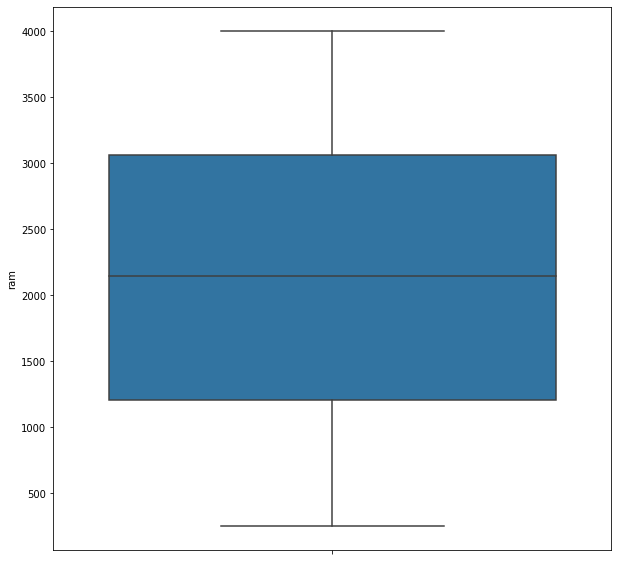

In [45]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data['ram'],orient='v')

In [157]:
numeric_features=data.drop(['bluetooth','dual_sim','four_g','three_g','touch_screen','wifi','price_range'],axis=1)
print(type(numeric_features))

<class 'pandas.core.frame.DataFrame'>


[Text(0, 0, 'battery_power'),
 Text(0, 0, 'clock_speed'),
 Text(0, 0, 'fc_megapixel'),
 Text(0, 0, 'int_memory'),
 Text(0, 0, 'm_depth'),
 Text(0, 0, 'mobile_wt'),
 Text(0, 0, 'n_cores'),
 Text(0, 0, 'pc_megapixel'),
 Text(0, 0, 'px_height'),
 Text(0, 0, 'px_width'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'sc_h'),
 Text(0, 0, 'sc_w'),
 Text(0, 0, 'talk_time')]

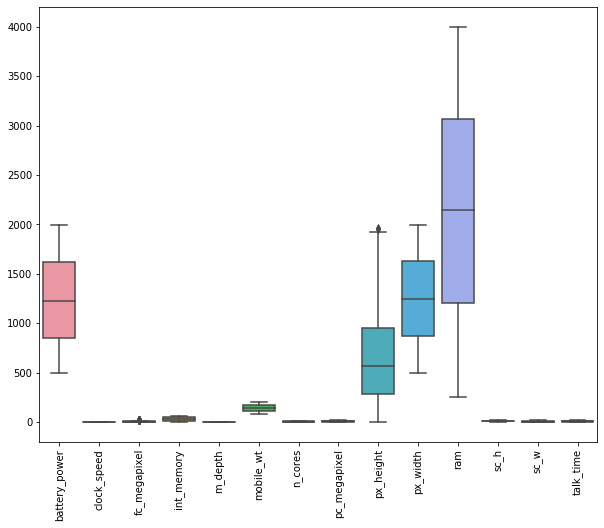

In [52]:
fig,ax=plt.subplots(figsize=(10,8))
bp=sns.boxplot(data=numeric_features)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)

In [59]:
from sklearn.preprocessing import StandardScaler
scaled_numeric=StandardScaler().fit_transform(numeric_features)
print(type(scaled_numeric))

<class 'numpy.ndarray'>


In [61]:
scaled_numeric_df=pd.DataFrame(scaled_numeric,columns=numeric_features.columns)

In [63]:
scaled_numeric_df.describe()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.545430e-16,5.861978e-17,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-1.253064e+00,-9.928904e-01,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00
25%,-8.804033e-01,-1.007906e+00,-7.624947e-01,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01
50%,-2.849593e-02,-2.727384e-02,-3.017032e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03
75%,8.575560e-01,8.307794e-01,6.198797e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01
max,1.728812e+00,1.811412e+00,3.384628e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00


[Text(0, 0, 'battery_power'),
 Text(0, 0, 'clock_speed'),
 Text(0, 0, 'fc_megapixel'),
 Text(0, 0, 'int_memory'),
 Text(0, 0, 'm_depth'),
 Text(0, 0, 'mobile_wt'),
 Text(0, 0, 'n_cores'),
 Text(0, 0, 'pc_megapixel'),
 Text(0, 0, 'px_height'),
 Text(0, 0, 'px_width'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'sc_h'),
 Text(0, 0, 'sc_w'),
 Text(0, 0, 'talk_time')]

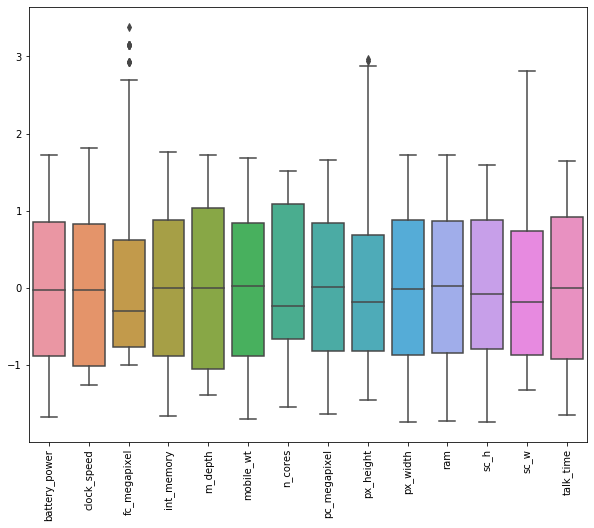

In [64]:
fig,ax=plt.subplots(figsize=(10,8))
bp=sns.boxplot(data=scaled_numeric_df)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)

In [89]:
Q1=numeric_features.quantile(0.25)
Q3=numeric_features.quantile(0.75)
#print(Q3)

In [90]:
IQR=Q3-Q1

In [101]:
outliers_removed=numeric_features[~((numeric_features > (Q3+1.5*IQR) ) | (numeric_features < (Q1-1.5*IQR))).any(axis=1)]

In [102]:
outliers_removed.shape

(1980, 14)

In [123]:
categorical_data=data[['bluetooth','dual_sim','four_g','three_g','touch_screen','wifi','price_range']]

In [124]:
from sklearn.model_selection import train_test_split

In [127]:
scaled_numeric_df.reset_index()
categorical_data.reset_index()

,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,0,1,1
1,1,1,1,1,1,1,0,2
2,2,1,1,1,1,1,0,2
3,3,1,0,0,1,0,0,2
4,4,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...
1995,1995,1,1,1,1,1,0,0
1996,1996,1,1,0,1,1,1,2
1997,1997,0,1,1,1,1,0,3
1998,1998,0,0,1,1,1,1,0


In [128]:
final_df=pd.concat([scaled_numeric_df,categorical_data],axis=1)

In [130]:
final_df.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,...,sc_h,sc_w,talk_time,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,...,-0.784983,0.283103,1.462493,0,0,0,0,0,1,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,...,1.114266,-0.635317,-0.734267,1,1,1,1,1,0,2
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,...,-0.310171,-0.864922,-0.368140,1,1,1,1,1,0,2
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,...,0.876859,0.512708,-0.002014,1,0,0,1,0,0,2
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,...,-1.022389,-0.864922,0.730240,1,0,1,1,1,0,1


In [134]:
x=final_df.drop(['price_range'],axis=1)
y=final_df[['price_range']]
print(y)

      price_range
0               1
1               2
2               2
3               2
4               1
...           ...
1995            0
1996            2
1997            3
1998            0
1999            3

[2000 rows x 1 columns]


In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [152]:
y_test.shape

(400, 1)

In [154]:
from sklearn.linear_model import LogisticRegression
logistic_regressor=LogisticRegression(solver='sag',multi_class='multinomial',max_iter=1000)

In [155]:
logistic_regressor.fit(x_train,y_train)

/home/syed/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
logistic_regressor.score(x_test,y_test)

0.955